<a href="https://colab.research.google.com/github/RajDhyaneshvarCJ/Reasoning-Audits-with-Benchmarks-Hallucination-triggers/blob/main/CoT_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# # import & config
# import json
# import time
# import uuid
# from datetime import datetime
# from openai import OpenAI
# from google.colab import userdata

# API_KEY = userdata.get('openai_nlp_key')
# if not API_KEY:
#     raise ValueError("key not found in secrets")

# client = OpenAI(api_key=API_KEY)

# MODEL_ANSWER = "gpt-4o-mini"
# MODEL_JUDGE = "gpt-4.1"           # Stronger judge
# TEMPERATURE_CLEAN = 0.2
# TEMPERATURE_MESSY = 0.8

# RAW_DATASET_PATH = "dataset_raw.jsonl"

# # OUTPUT_PATH = "dataset_with_cot.jsonl" for full run
# OUTPUT_PATH = "dataset_with_cot_sample_runs.jsonl"


# # load ds
# def load_raw_dataset(path):
#     with open(path, "r") as f:
#         return [json.loads(line) for line in f]

# raw_data = load_raw_dataset(RAW_DATASET_PATH)
# print("Loaded samples:", len(raw_data))


# # prompt for CoT
# COT_PROMPT_CLEAN = """
# You are a serious reasoning assistant.

# Given the context and question, produce:
# 1. very short chain of thought in steps as a JSON array
# 2. a final answer

# Return JSON only:
# {
#   "cot": ["step 1...", "step 2..."],
#   "answer": "..."
# }

# Context:
# {context}

# Question:
# {question}
# """


# COT_PROMPT_MESSY = """
# Explain your reasoning in multiple steps before answering.

# Return JSON only:
# {
#   "cot": ["step 1...", "step 2..."],
#   "answer": "..."
# }

# Context:
# {context}

# Question:
# {question}
# """

# # llm call for answers
# def generate_cot(context, question, clean=True):
#     prompt = (COT_PROMPT_CLEAN if clean else COT_PROMPT_MESSY)
#     formatted = prompt.format(context=context, question=question)

#     try:
#         response = client.chat.completions.create(
#             model=MODEL_ANSWER,
#             messages=[{"role": "user", "content": formatted}],
#             temperature=TEMPERATURE_CLEAN if clean else TEMPERATURE_MESSY,
#         )
#         return json.loads(response.choices[0].message.content.strip())

#     except Exception as e:
#         print("Error:", e)
#         return {"cot": [], "answer": "ERROR"}



# # hallucination judge using gpt-4
# JUDGE_PROMPT = """
# You are a hallucination detection judge.

# Given:
# Context: {context}
# Question: {question}
# Answer: {answer}
# Reasoning steps: {cot}

# Determine if the answer is:
# - fully supported by the context,
# - contradicted by the context,
# - fabricated,
# - partially correct but contains hallucinations,
# - unsupported speculation.

# Return JSON ONLY:
# {
#   "label": "0" | "0.5" | "1",
#   "score": float
# }
# """

# # judge call
# def hallucination_judge_llm(context, question, answer, cot_steps):
#     formatted = JUDGE_PROMPT.format(
#         context=context,
#         question=question,
#         answer=answer,
#         cot=json.dumps(cot_steps)
#     )

#     try:
#         response = client.chat.completions.create(
#             model=MODEL_JUDGE,
#             messages=[{"role": "user", "content": formatted}],
#             temperature=0.0,
#         )
#         return json.loads(response.choices[0].message.content.strip())

#     except Exception as e:
#         print("Error in judge:", e)
#         return {
#             "label": "JUDGE_ERROR",
#             "score": -1
#         }



# # main loop
# output_rows = []

# for i, item in enumerate(raw_data):
#     if i == 10:
#         break
# # for i, item in enumerate(raw_data): for full run only
#     print(f"Processing {i+1}/{len(raw_data)}")

#     context = item.get("context", "")
#     question = item.get("question", "")
#     source = item.get("source", "")
#     cot_output = generate_cot(context, question, clean=True)

#     # hallucination judge
#     judge_result = hallucination_judge_llm(
#         context,
#         question,
#         cot_output["answer"],
#         cot_output["cot"]
#     )

#     row = {
#         "id": item.get("id", str(uuid.uuid4())),
#         "source": source,
#         "context": context,
#         "question": question,
#         "cot_steps": cot_output["cot"],
#         "answer": cot_output["answer"],
#         "hallucination_label": judge_result["label"],
#         "hallucination_score": judge_result["score"],
#         "metadata": {
#             "model_answer": MODEL_ANSWER,
#             "model_judge": MODEL_JUDGE,
#             "temperature": TEMPERATURE_CLEAN,
#             "timestamp": str(datetime.utcnow()),
#         }
#     }

#     output_rows.append(row)
#     time.sleep(0.4)


# # save
# with open(OUTPUT_PATH, "w") as f:
#     for row in output_rows:
#         f.write(json.dumps(row) + "\n")

# print("Saved:", OUTPUT_PATH)


Loaded samples: 1000
Processing 1/1000


KeyError: '\n  "cot"'

In [8]:
# import & config
import json
import time
import uuid
from datetime import datetime
from openai import OpenAI
from google.colab import userdata

API_KEY = userdata.get('openai_nlp_key')
if not API_KEY:
    raise ValueError("key not found in secrets")

client = OpenAI(api_key=API_KEY)

MODEL_ANSWER = "gpt-4o-mini"
TEMPERATURE_CLEAN = 0.2
TEMPERATURE_MESSY = 0.8

RAW_DATASET_PATH = "dataset_raw.jsonl"

# OUTPUT_PATH = "dataset_with_cot.jsonl" for full run
OUTPUT_PATH = "dataset_with_cot_unjudged.jsonl"


# load ds
def load_raw_dataset(path):
    with open(path, "r") as f:
        return [json.loads(line) for line in f]

raw_data = load_raw_dataset(RAW_DATASET_PATH)
print("Loaded samples:", len(raw_data))


# prompt for CoT
COT_PROMPT_CLEAN = """
You are a serious reasoning assistant.

Given the context and question, produce:
1. chain of thought in steps as a JSON array
2. a final answer

Return JSON only:
{{
  "cot": ["step 1...", "step 2..."],
  "answer": "..."
}}
Context:
{context}

Question:
{question}
"""


COT_PROMPT_MESSY = """
Explain your reasoning in multiple steps before answering.

Return JSON only:
{{}
  "cot": ["step 1...", "step 2..."],
  "answer": "..."
}}

Context:
{context}

Question:
{question}
"""

# llm call for answers
def generate_cot(context, question, clean=True):
    prompt = (COT_PROMPT_CLEAN if clean else COT_PROMPT_MESSY)
    formatted = prompt.format(context=context, question=question)

    try:
        response = client.chat.completions.create(
            model=MODEL_ANSWER,
            messages=[{"role": "user", "content": formatted}],
            temperature=TEMPERATURE_CLEAN if clean else TEMPERATURE_MESSY,
        )
        return json.loads(response.choices[0].message.content.strip())

    except Exception as e:
        print("Error:", e)
        return {"cot": [], "answer": "ERROR"}



# main loop
output_rows = []

for i, item in enumerate(raw_data):
    if i == 100:
        break
# for i, item in enumerate(raw_data): for full run only
    print(f"Processing {i+1}/{len(raw_data)}")

    context = item.get("context", "")
    question = item.get("question", "")
    source = item.get("source", "")
    cot_output = generate_cot(context, question, clean=True)

    row = {
        "id": item.get("id", str(uuid.uuid4())),
        "source": source,
        "context": context,
        "question": question,
        "cot_steps": cot_output["cot"],
        "answer": cot_output["answer"],
        "metadata": {
            "model_answer": MODEL_ANSWER,
            "temperature": TEMPERATURE_CLEAN,
            "timestamp": str(datetime.utcnow()),
        }
    }

    output_rows.append(row)
    time.sleep(0.4)


# save
with open(OUTPUT_PATH, "w") as f:
    for row in output_rows:
        f.write(json.dumps(row) + "\n")

print("Saved:", OUTPUT_PATH)


Loaded samples: 1000
Processing 1/1000


/tmp/ipython-input-2669721822.py:114: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": str(datetime.utcnow()),


Processing 2/1000
Processing 3/1000
Processing 4/1000
Processing 5/1000
Processing 6/1000
Processing 7/1000
Processing 8/1000
Processing 9/1000
Processing 10/1000
Processing 11/1000
Processing 12/1000
Processing 13/1000
Processing 14/1000
Processing 15/1000
Processing 16/1000
Processing 17/1000
Processing 18/1000
Processing 19/1000
Processing 20/1000
Processing 21/1000
Processing 22/1000
Processing 23/1000
Processing 24/1000
Processing 25/1000
Processing 26/1000
Processing 27/1000
Processing 28/1000
Processing 29/1000
Processing 30/1000
Processing 31/1000
Processing 32/1000
Processing 33/1000
Processing 34/1000
Processing 35/1000
Processing 36/1000
Processing 37/1000
Processing 38/1000
Processing 39/1000
Processing 40/1000
Processing 41/1000
Processing 42/1000
Processing 43/1000
Processing 44/1000
Processing 45/1000
Processing 46/1000
Processing 47/1000
Processing 48/1000
Processing 49/1000
Processing 50/1000
Processing 51/1000
Processing 52/1000
Processing 53/1000
Processing 54/1000
P

JUDGE

In [9]:
# import & config
import json
import time
from datetime import datetime
from openai import OpenAI
from google.colab import userdata

API_KEY = userdata.get('openai_nlp_key')
if not API_KEY:
    raise ValueError("key not found in secrets")

client = OpenAI(api_key=API_KEY)

MODEL_JUDGE = "gpt-4.1"

INPUT_PATH = "dataset_with_cot_unjudged.jsonl"
OUTPUT_PATH = "dataset_with_cot_judged.jsonl"


# load dataset
def load_dataset(path):
    with open(path, "r") as f:
        return [json.loads(line) for line in f]

data = load_dataset(INPUT_PATH)
print("Loaded for judging:", len(data))



# hallucination judge using gpt-4
JUDGE_PROMPT = """
You are a hallucination detection judge.

Given:
Context: {context}
Question: {question}
Answer: {answer}
Reasoning steps: {cot}

Determine if the answer is:
- fully supported by the context,
- contradicted by the context,
- fabricated,
- Only mark ‘1’ if the answer introduces factual content not present in the context.,
- if the model had smoothen the grammar or rewrites without introducing new factual data, it is not a hallucination
- give "0.5" if it seems right but got the context jumbled up,
- unsupported speculation.

Return JSON ONLY:
{{
  "label": "0" | "0.5" | "1"
}}
"""

# judge call
def hallucination_judge_llm(context, question, answer, cot_steps):
    formatted = JUDGE_PROMPT.format(
        context=context,
        question=question,
        answer=answer,
        cot=json.dumps(cot_steps)
    )

    try:
        response = client.chat.completions.create(
            model=MODEL_JUDGE,
            messages=[{"role": "user", "content": formatted}],
            temperature=0.0,
        )
        return json.loads(response.choices[0].message.content.strip())

    except Exception as e:
        print("Error in judge:", e)
        return {"label": "JUDGE_ERROR"}



# judging loop
judged_rows = []

for i, item in enumerate(data):
    print(f"Judging {i+1}/{len(data)}")

    judge_result = hallucination_judge_llm(
        item["context"],
        item["question"],
        item["answer"],
        item["cot_steps"]
    )

    item["hallucination_label"] = judge_result["label"]
    item["metadata"]["model_judge"] = MODEL_JUDGE
    item["metadata"]["judged_timestamp"] = str(datetime.utcnow())

    judged_rows.append(item)
    time.sleep(0.4)



# save
with open(OUTPUT_PATH, "w") as f:
    for row in judged_rows:
        f.write(json.dumps(row) + "\n")

print("judged dataset:", OUTPUT_PATH)


Loaded for judging: 100
Judging 1/100


/tmp/ipython-input-3179100920.py:93: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  item["metadata"]["judged_timestamp"] = str(datetime.utcnow())


Judging 2/100
Judging 3/100
Judging 4/100
Judging 5/100
Judging 6/100
Judging 7/100
Judging 8/100
Judging 9/100
Judging 10/100
Judging 11/100
Judging 12/100
Judging 13/100
Judging 14/100
Judging 15/100
Judging 16/100
Judging 17/100
Judging 18/100
Judging 19/100
Judging 20/100
Judging 21/100
Judging 22/100
Judging 23/100
Judging 24/100
Judging 25/100
Judging 26/100
Judging 27/100
Judging 28/100
Judging 29/100
Judging 30/100
Judging 31/100
Judging 32/100
Judging 33/100
Judging 34/100
Judging 35/100
Judging 36/100
Judging 37/100
Judging 38/100
Judging 39/100
Judging 40/100
Judging 41/100
Judging 42/100
Judging 43/100
Judging 44/100
Judging 45/100
Judging 46/100
Judging 47/100
Judging 48/100
Judging 49/100
Judging 50/100
Judging 51/100
Judging 52/100
Judging 53/100
Judging 54/100
Judging 55/100
Judging 56/100
Judging 57/100
Judging 58/100
Judging 59/100
Judging 60/100
Judging 61/100
Judging 62/100
Judging 63/100
Judging 64/100
Judging 65/100
Judging 66/100
Judging 67/100
Judging 68/100
Jud

visualss

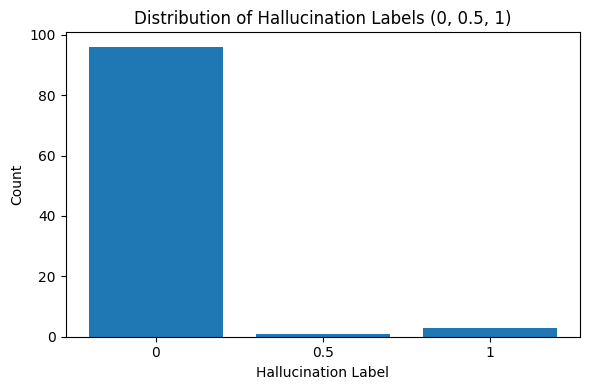

In [10]:
import json
import matplotlib.pyplot as plt
from collections import Counter

dataset_path = "dataset_with_cot_judged.jsonl"

labels = []

with open(dataset_path, "r") as f:
    for line in f:
        row = json.loads(line)
        labels.append(row.get("hallucination_label"))

#count
counts = Counter(labels)
ordered_labels = ["0", "0.5", "1"]
values = [counts.get(lbl, 0) for lbl in ordered_labels]

#graph
plt.figure(figsize=(6,4))
plt.bar(ordered_labels, values)
plt.xlabel("Hallucination label")
plt.ylabel("count")
plt.title("Distribution of hallucination(0, 0.5, 1)")
plt.tight_layout()
plt.show()
